# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
#conda update conda

In [3]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.19.2
Pandas version: 1.1.3
Seaborn version: 0.11.0
Matplotlib version: 3.3.2
Sklearn version: 0.23.2
Statsmodels version: 0.12.0


## Read the data from the '.csv' file as a monthly Time Series.

In [4]:
df = pd.read_csv('Sales_quantity.csv')
df.head()

,Sales_quantity
0,12729
1,11636
2,15922
3,15227
4,8620


In [5]:
Time_Stamp = pd.date_range(start='2015-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [6]:
df['Time_Stamp'] = Time_Stamp
df.head()

,Sales_quantity,Time_Stamp
0,12729,2015-01-31
1,11636,2015-02-28
2,15922,2015-03-31
3,15227,2015-04-30
4,8620,2015-05-31


In [7]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620
...,...
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509


## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

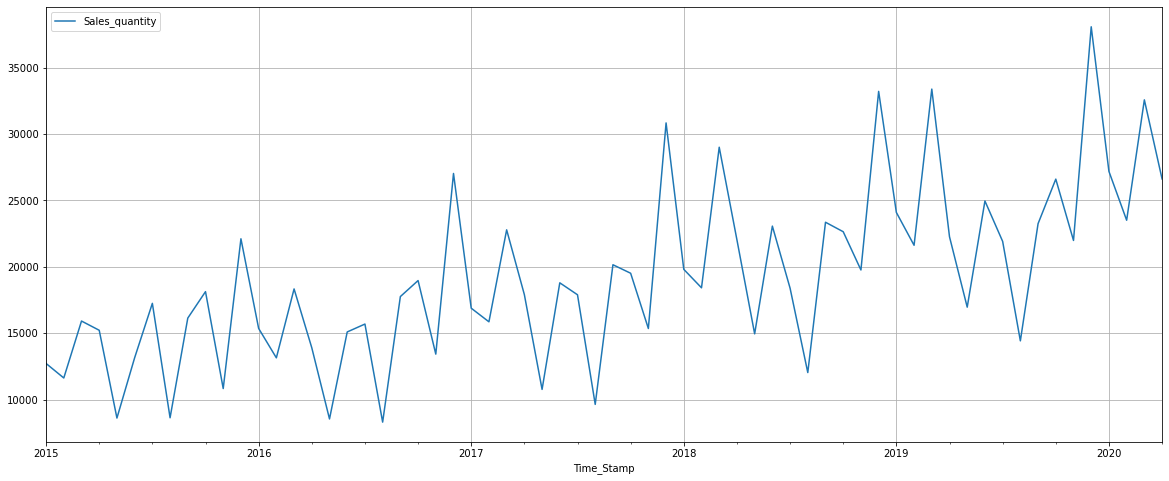

In [9]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Decompose the Time Series and plot the different components.

In [11]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

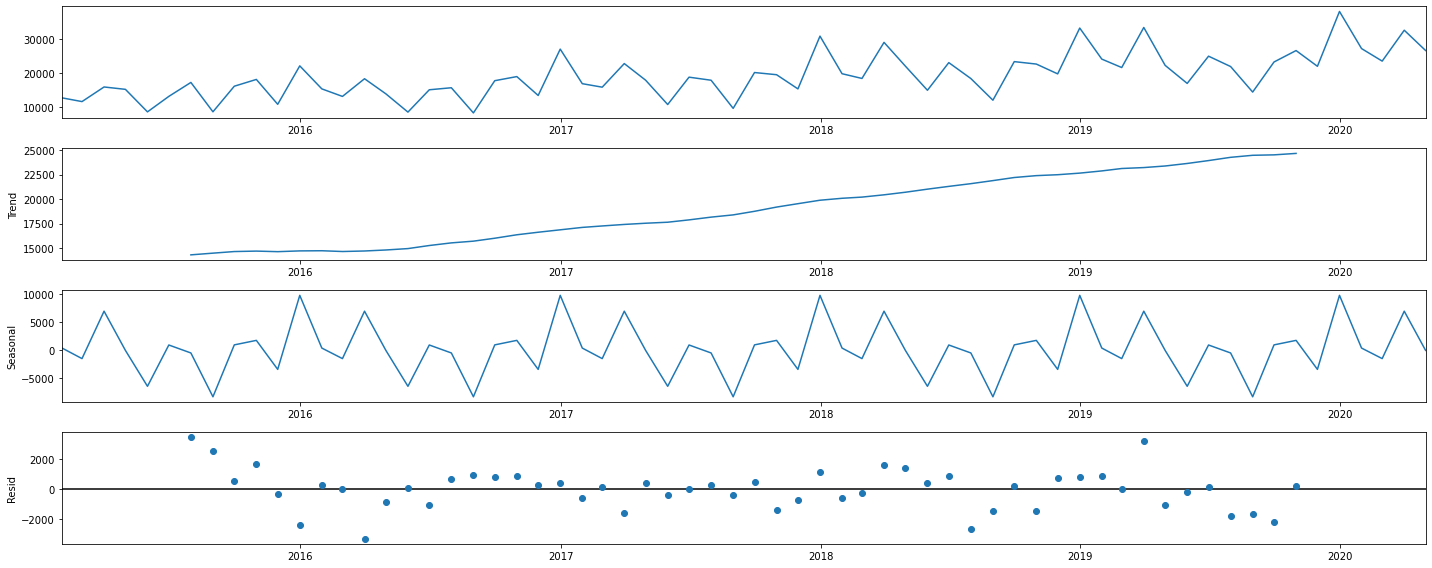

In [12]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31     334.942708
2015-02-28   -1548.182292
2015-03-31    6928.213542
2015-04-30     -81.796875
2015-05-31   -6501.359375
2015-06-30     883.578125
2015-07-31    -540.938542
2015-08-31   -8376.538542
2015-09-30     905.194792
2015-10-31    1709.969792
2015-11-30   -3474.494792
2015-12-31    9761.411458
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31            NaN
2015-02-28            NaN
2015-03-31            NaN
2015-04-30            NaN
2015-05-31            NaN
2015-06-30            NaN
2015-07-31    3483.188542
2015-08-31    2533.746875
2015-09-30     590.096875
2

### Multiplicative Decomposition

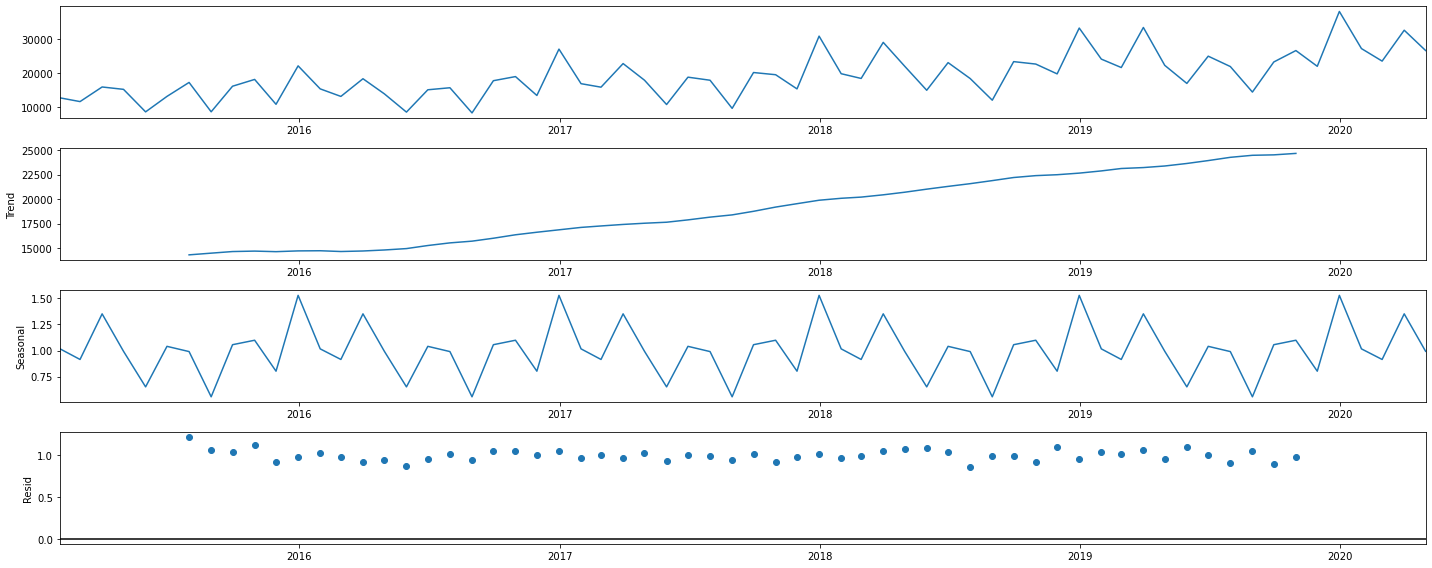

In [14]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31    1.016014
2015-02-28    0.914684
2015-03-31    1.351165
2015-04-30    0.992906
2015-05-31    0.652248
2015-06-30    1.040221
2015-07-31    0.990120
2015-08-31    0.557343
2015-09-30    1.055952
2015-10-31    1.098610
2015-11-30    0.802419
2015-12-31    1.528319
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31         NaN
2015-02-28         NaN
2015-03-31         NaN
2015-04-30         NaN
2015-05-31         NaN
2015-06-30         NaN
2015-07-31    1.217613
2015-08-31    1.070482
2015-09-30    1.043681
2015-10-31    1.123361
2015-11-30    0.923043
2015-12-31    0.98

For the multiplicative series, we see that a lot of residuals are located around 1.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.531
DF test p-value is 0.31260712778041244
Number of lags used 11


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [18]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.267
DF test p-value is 9.130089570109715e-14
Number of lags used 10


Now, let us go ahead and plot the stationary series.

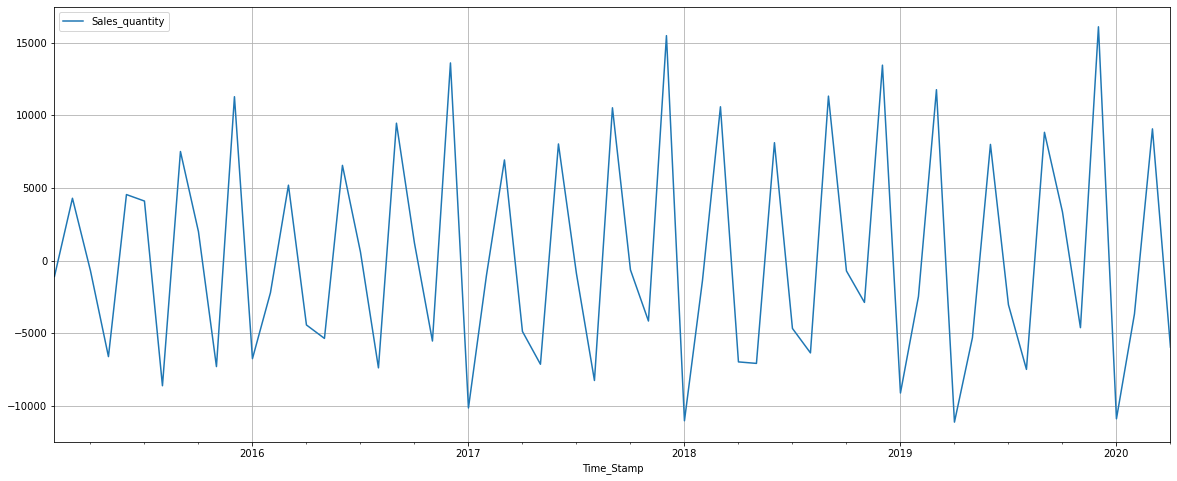

In [19]:
df.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

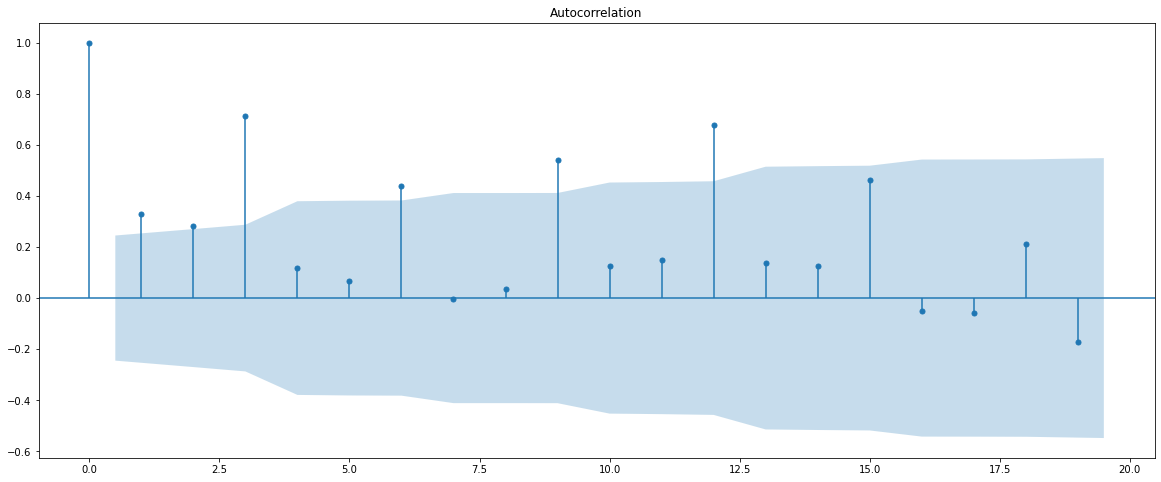

In [21]:
plot_acf(df,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


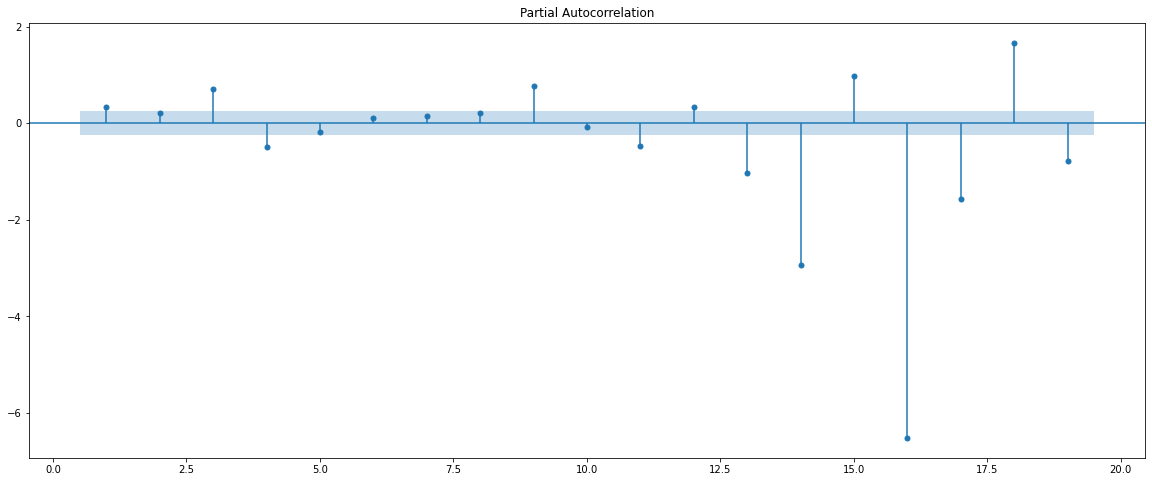

In [22]:
plot_pacf(df,zero=False,alpha=0.05);

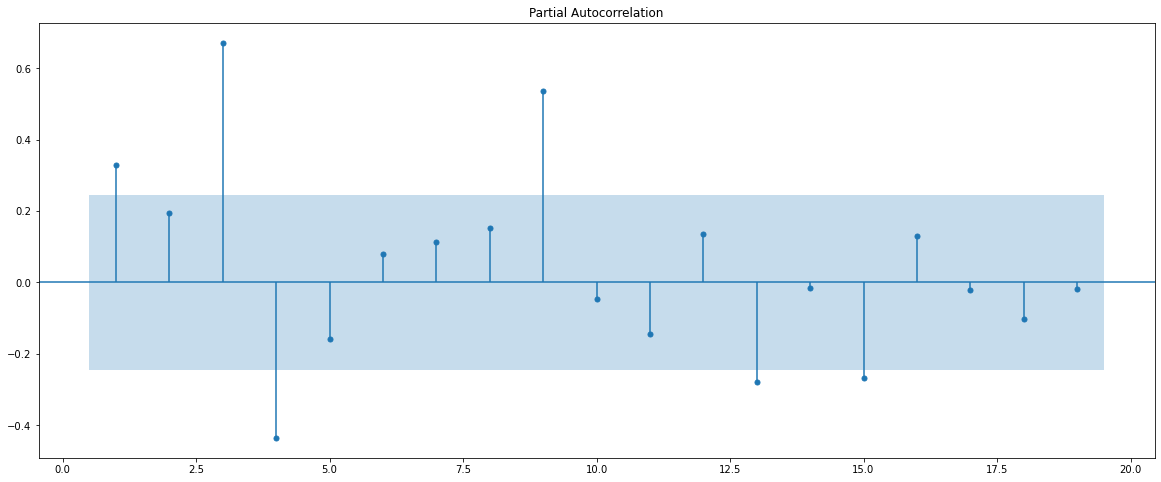

In [23]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [24]:
df.index.year.unique()

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Time_Stamp')

In [25]:
train = df[df.index<='2019'] 
test = df[df.index>'2019']

In [26]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620


Last few rows of Training Data


,Sales_quantity
Time_Stamp,
2018-08-31,12045
2018-09-30,23358
2018-10-31,22644
2018-11-30,19765
2018-12-31,33207


First few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-01-31,24096
2019-02-28,21624
2019-03-31,33379
2019-04-30,22265
2019-05-31,16967


Last few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509
2020-03-31,32569
2020-04-30,26615


In [28]:
print(train.shape)
print(test.shape)

(48, 1)
(16, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

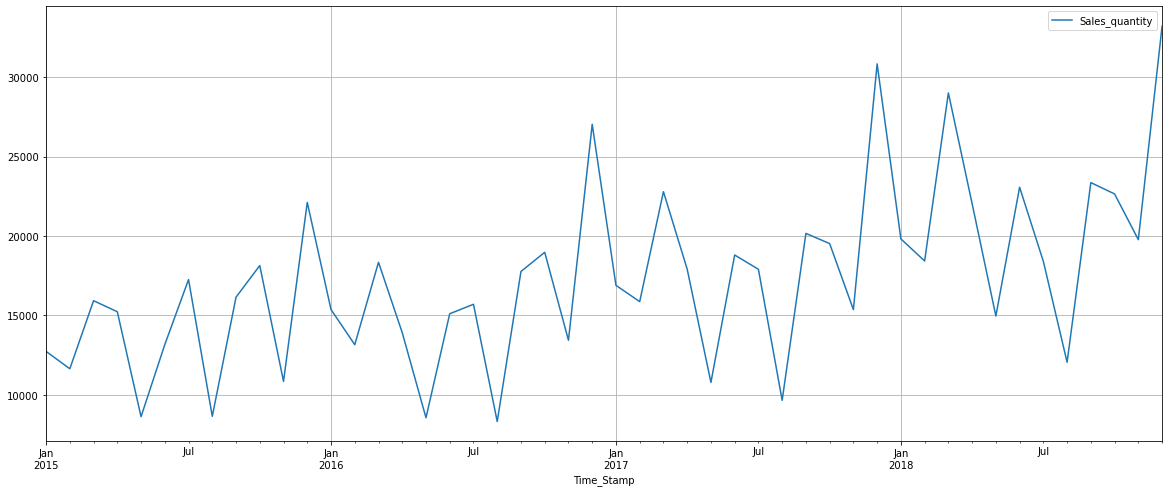

In [29]:
train.plot(grid=True);

In [30]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.419
DF test p-value is 0.8553111705791552
Number of lags used 10


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [31]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -10.821
DF test p-value is 4.9223220486542666e-17
Number of lags used 10


Now, let us go ahead and plot the differenced training data.

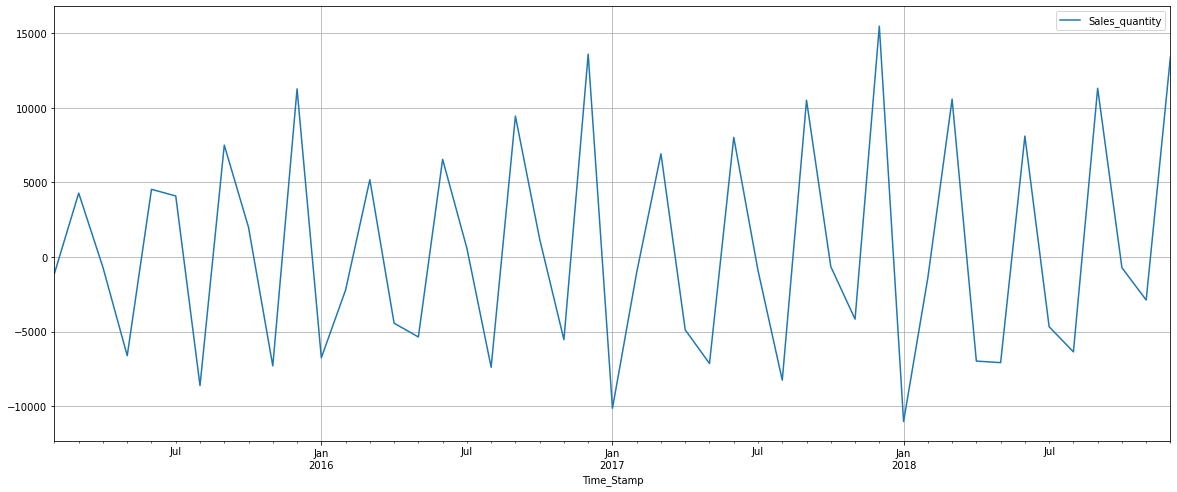

In [32]:
train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sales_quantity  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [34]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [35]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [36]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sales_quantity'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:970.5800792205061
ARIMA(0, 1, 1) - AIC:946.3747183841125
ARIMA(0, 1, 2) - AIC:938.9397432347635
ARIMA(0, 1, 3) - AIC:936.7087068253538
ARIMA(1, 1, 0) - AIC:960.0540231080712
ARIMA(1, 1, 1) - AIC:947.2909679464964


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:946.6935731902595
ARIMA(1, 1, 3) - AIC:934.5647350244471
ARIMA(2, 1, 0) - AIC:927.6243792519214
ARIMA(2, 1, 1) - AIC:924.6612101380981
ARIMA(2, 1, 2) - AIC:912.7956223396557
ARIMA(2, 1, 3) - AIC:917.4649014509893
ARIMA(3, 1, 0) - AIC:922.4967399939063
ARIMA(3, 1, 1) - AIC:924.4464860407973
ARIMA(3, 1, 2) - AIC:916.9388191501498


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:916.0039671583892


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",912.795622
15,"(3, 1, 3)",916.003967
14,"(3, 1, 2)",916.938819
11,"(2, 1, 3)",917.464901
12,"(3, 1, 0)",922.496740


In [38]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -451.398
Date:                Tue, 23 Feb 2021   AIC                            912.796
Time:                        07:50:57   BIC                            922.046
Sample:                    01-31-2015   HQIC                           916.277
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9869      0.035    -28.118      0.000      -1.056      -0.918
ar.L2         -0.9671      0.023    -41.201      0.000      -1.013      -0.921
ma.L1          0.6901      0.131      5.282      0.0

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Diagnostics plot.

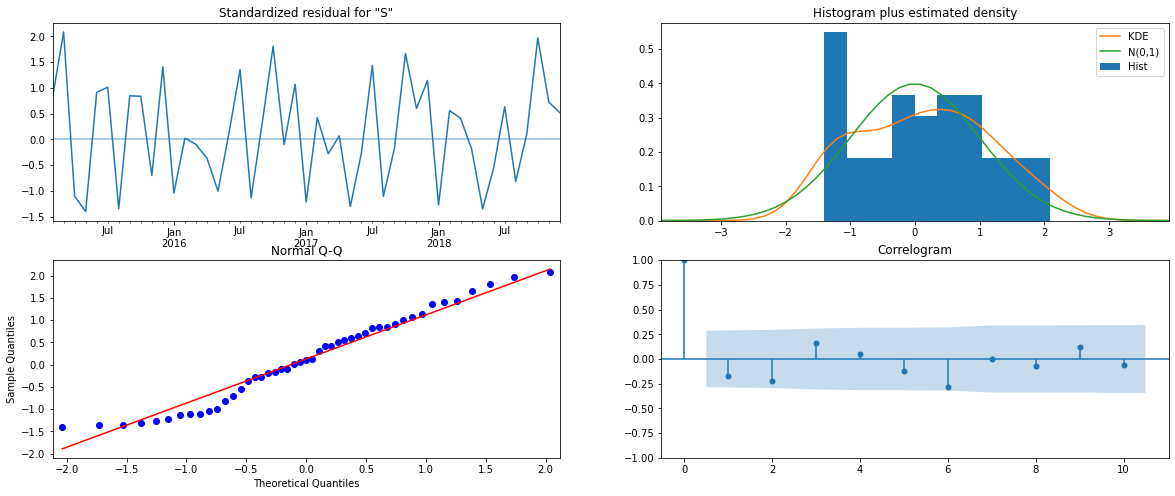

In [39]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [40]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [41]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [42]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4400.53713677271 
MAPE: 14.606968423248961


In [43]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

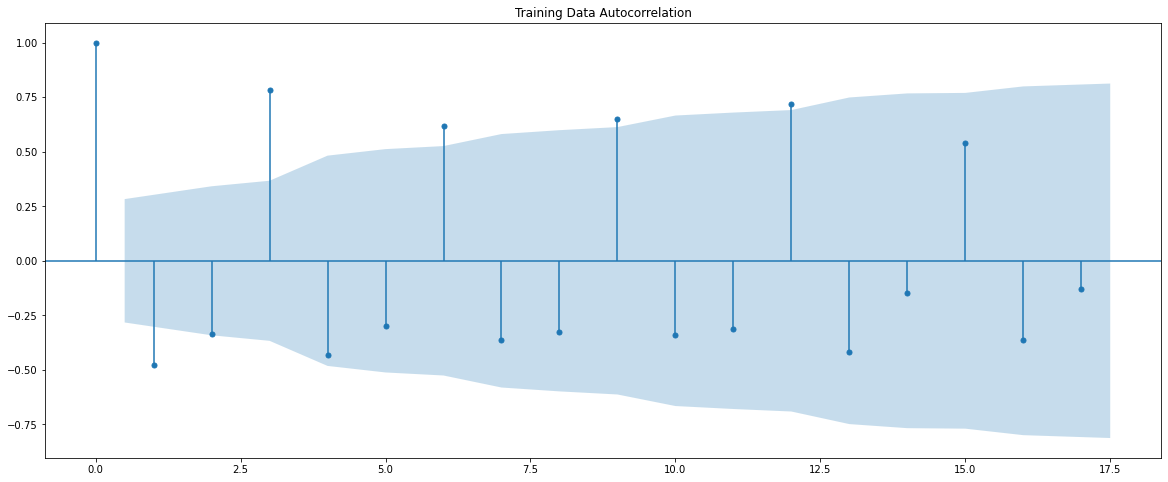

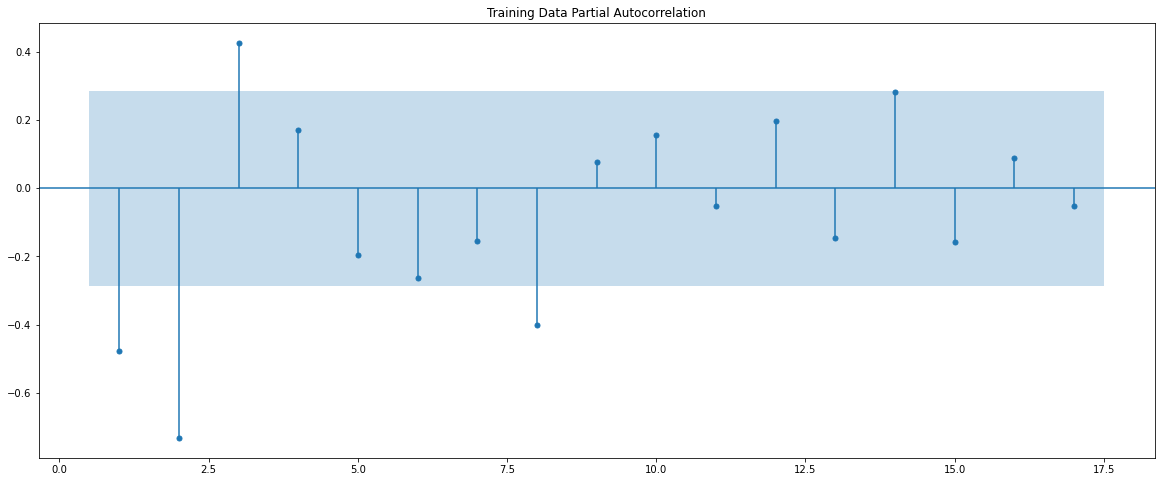

In [44]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [45]:
manual_ARIMA = ARIMA(train['Sales_quantity'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -451.002
Date:                Tue, 23 Feb 2021   AIC                            916.004
Time:                        07:50:59   BIC                            928.955
Sample:                    01-31-2015   HQIC                           920.878
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3030      0.353     -0.857      0.391      -0.996       0.390
ar.L2         -0.2931      0.337     -0.870      0.384      -0.954       0.367
ar.L3          0.6590      0.343      1.921      0.0

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Let us analyse the residuals from the various diagnostics plot.

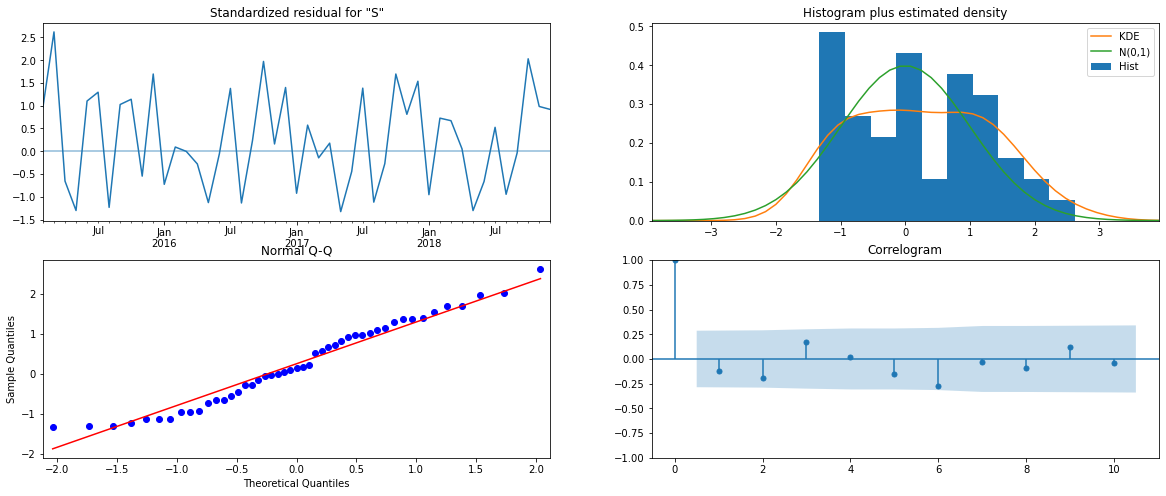

In [46]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [47]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [48]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4094.9687711451666 
MAPE: 14.383638958926545


In [49]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

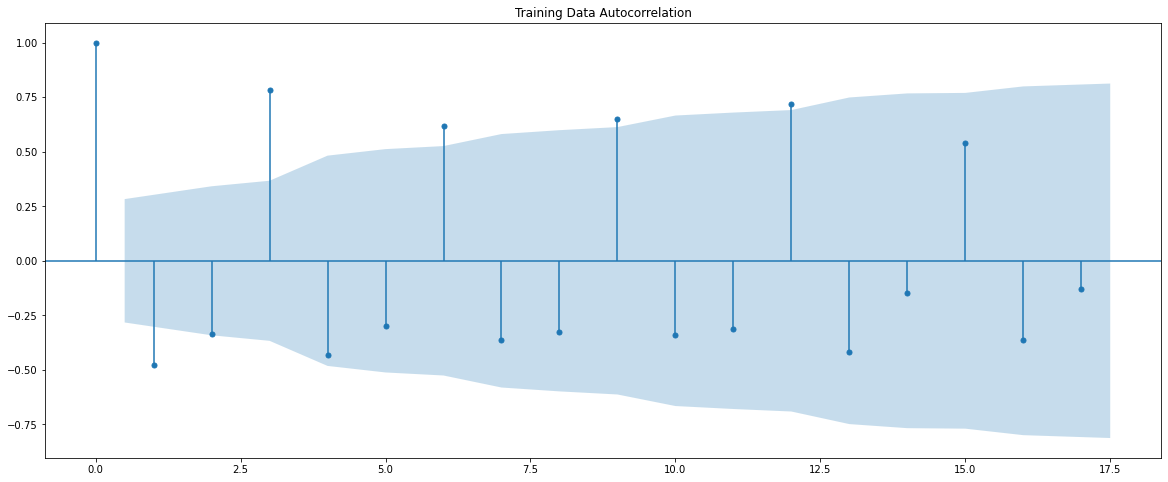

In [50]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [51]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [52]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [53]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales_quantity'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:950.9698819117601
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:824.6387628791765


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1573.5796767511624
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:566.0463827837658
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:826.8368008474987
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:796.075823174873


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1450.0771297318083
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:523.8434054748495
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:627.0035938265593
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:626.5860152586524
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:612.099848042319


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:500.17865827847504
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:514.6367326495093
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:511.5322644968323
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:513.3053667110634
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:495.1762343164705
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:910.6959030043946
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:791.9136892949998
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1474.188819900805
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:546.1317843089762
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:829.026625891162
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:766.861140228866


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1394.1076711645792
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:504.83249539138114
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:627.2022925492496
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:626.7061925262414
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:592.8244178913741
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:485.21578336763315
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:514.9278061392246
SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:514.5963552708831


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:513.8874861479276
SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:479.79853978898694
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:886.7713285814715
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:768.5578871701036


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1567.512037378874
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:506.84282247908385
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:806.5079318378768
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:766.3846044684905


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1339.9191711406997
SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:489.5230480358039
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:628.315040705186
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:628.6890922819601
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:567.0271996704544
SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:464.29099626616863
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:514.8862406645945
SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:514.3237773653814
SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:511.89796071809644
SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:464.23796525409796
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:866.5858981966012
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:748.6492157092454


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1443.5734891746538
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:508.07346464183087
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:826.4312834174241
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:727.1814121323993


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1297.5972860479621
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:461.8960602387033
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:628.8146779857896
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:623.830438715697
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:552.29886135119
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:443.7450087081854
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:516.6023553780042
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:513.9855280530705
SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:513.8067133603399
SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:445.7304299870774
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:940.0451530415274
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:813.8083525628417
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1574.1950169229078
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:552.8933777232205
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:803.2602408952864
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:784.1050529463432


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1462.4183361720811
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:557.6109256385945
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:608.2801046539113
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:609.0641904586362
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:610.6259548448979
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:501.1847798223592
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:498.11052471842606
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:493.10608014312834
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:495.0534499599012
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:497.0121283693915
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:908.199099873356
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:790.7750892548004


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1655.818686633743
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:530.5895141725308
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:805.6296507291313
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:765.8285626220119


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1385.7736983088346
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:540.9424438830221
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:609.4062338563868
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:610.6241161561384
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:591.2268841117722
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:480.1229263877081
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:500.1074424988079
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:498.8881775914385
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:497.20058217398446
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:481.8852834309865
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:890.9398669161976
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:773.4008160276982


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1673.0675947768877
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:511.2850209463567
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:802.9325753169163
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:746.520955730781


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1569.8048231147432
SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:524.5910603417638
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:608.9080787312759
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:608.1467129035948
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:570.9432950653758
SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:465.13828451447716
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:500.5520933289748
SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:497.97797018222076
SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:497.308682930499
SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:466.9858435710232
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:861.8724595586973
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:743.9926132920174


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1446.8734458068145
SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:486.8583709984038
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:783.3313031764866
SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:723.5180725602518


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1256.6926571577635
SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:469.30169114958557
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:605.8242549224135
SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:606.7808962173743
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:554.0395056093631
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:445.23509905295515
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:500.3248758840866
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:495.6952930522039
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:499.30961749159655
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:445.9404679394137
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:878.8626858473186
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:780.3755240767891


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1749.0699417599492
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:534.0487964710185
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:746.3124744016503
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:743.9800123089221


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1642.0277314246782
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:515.5514934696122
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:588.1197235421317
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:590.1080869480836
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:591.2086557120533
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:499.46745021252895
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:482.04094213226966
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:477.90110251170705
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:479.88745609219063
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:481.7962801748663
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:876.3752393054667
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:759.0326521869645


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1348.4226120163344
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:515.2459818585439
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:745.4469737621521
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:760.9587471111912


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1288.7760027447137
SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:499.78608716757384
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:581.2365800437758
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:583.2091686754677
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:583.1265380474952
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:483.1084985661955
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:480.9807186774625
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:479.55589532698866
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:482.025846862118
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:483.88351203599507
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:847.5617616999684
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:725.0021285449303


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1468.0030883518314
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:497.0652996770017
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:733.8170315354074
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:713.5993860105126


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1202.3549200492978
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:493.4182578161239
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:575.7259590127348
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:590.1732376170245
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:567.4068136586327
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:466.7468329493524
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:478.3629626928307
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:478.0140875269769
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:482.4143871152004
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:463.98258910280725
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:832.7214529322057
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:714.5980496327643
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1448.6282922460641
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:486.5041459579576
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:745.2742081503274
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:706.1698888797127


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1385.2252987684878
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:484.77697217631464
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:582.712978715189
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:579.5130508935715
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:546.2144189172808
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:447.3054925854118
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:484.1987668837502
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:470.9525593944358
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:472.9521607242476
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:450.66142845152785
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:855.2910835206819
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:775.9550658698538
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1585.7148896348062
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:537.8385527932877
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:726.7532205844724
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:723.8159003759705


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1574.0014916388388
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:515.1418836223611
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:563.6240693196419
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:565.5524362029144
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:565.7395028413475
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:499.75350612203493
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:465.1573574711867
SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:467.1592959270419
SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:464.0623470923316
SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:465.99516163038516
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:857.0162163611533
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:757.0132021374211


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:1455.2526720393041
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:513.9656767803212
SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:727.5344772145119
SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:725.1744677067277


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:1423.9937713291454
SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:500.3925658850173
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:564.8081355103725
SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:567.9081297667009
SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:569.0627824516712
SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:485.97702329066965
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:466.403220335624
SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:463.98134975762974
SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:468.48251697290925
SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:467.44327075332774
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:841.9055380802215
SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:726.7147725334225


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:1685.8403438682637
SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:498.6227790526433
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:716.5086411231846
SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:714.5121329797556


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1419.7161571225245
SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:495.301800600918
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:560.8560663621449
SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:567.6335377378903
SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:564.6554897812604
SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:465.4340560192737
SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:465.3548154542857
SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:462.28709468167585
SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:465.26930230958317
SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:470.8832087740351
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:828.5515152440197
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:704.493386598931
SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1232.3019431862886
SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:479.24856296141587
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:714.4709055008984
SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:691.4701000167287
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1269.5562158074931


/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:475.2972706671849
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:564.6148048779845
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:560.6466164853199
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:546.3965999862442
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:444.68770195925305
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:464.26438999857925
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:467.1826911480387
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:463.6270297817676
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:446.0140341402706


In [54]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",443.745009
251,"(3, 1, 3)","(2, 0, 3, 6)",444.687702
123,"(1, 1, 3)","(2, 0, 3, 6)",445.235099
63,"(0, 1, 3)","(3, 0, 3, 6)",445.730430
127,"(1, 1, 3)","(3, 0, 3, 6)",445.940468


In [55]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -211.970
Date:                           Tue, 23 Feb 2021   AIC                            445.940
Time:                                   07:53:27   BIC                            459.348
Sample:                               01-31-2015   HQIC                           449.659
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7612      0.159      4.788      0.000       0.450       1.073
ma.L1         -1.6438      0.797     -2.062

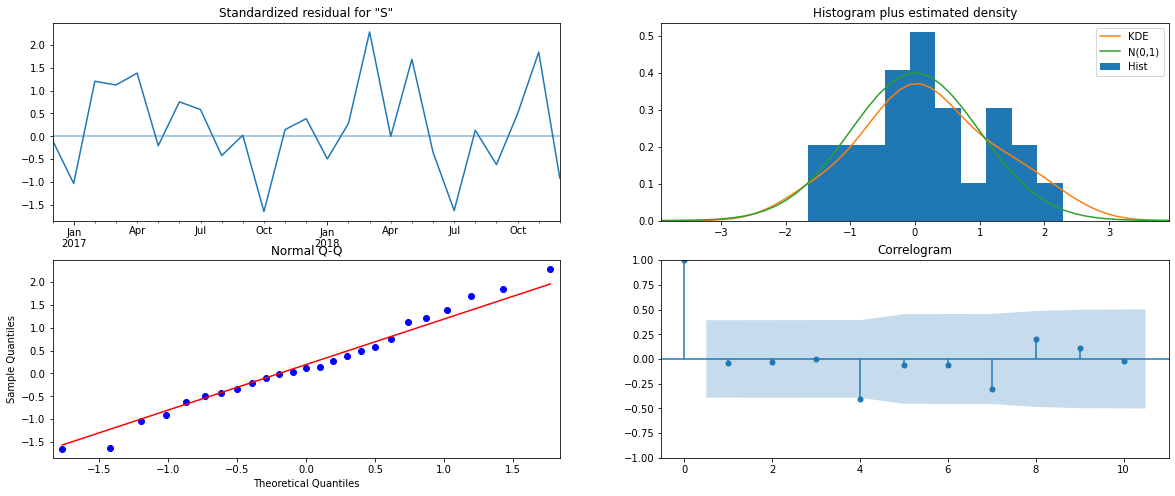

In [56]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [57]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [58]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-31,22676.761277,1047.327750,20624.036606,24729.485948
2019-02-28,20521.883906,1061.796822,18440.800375,22602.967437
2019-03-31,32957.006148,1076.174076,30847.743718,35066.268578
2019-04-30,25920.750467,1082.326248,23799.430001,28042.070932
2019-05-31,18636.242977,1084.345865,16510.964136,20761.521819


In [59]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2388.7557673810975 
MAPE: 7.939640007346174


In [60]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

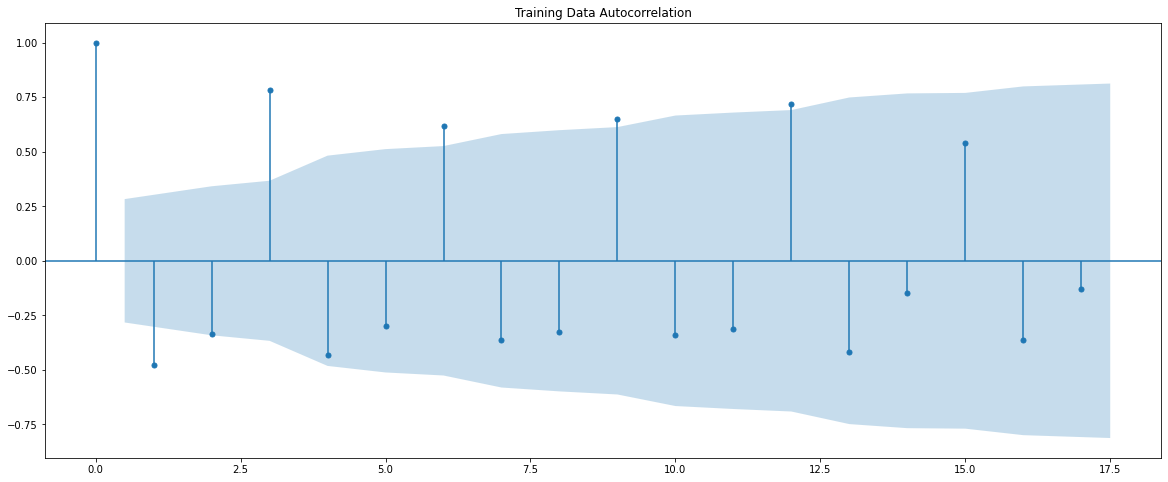

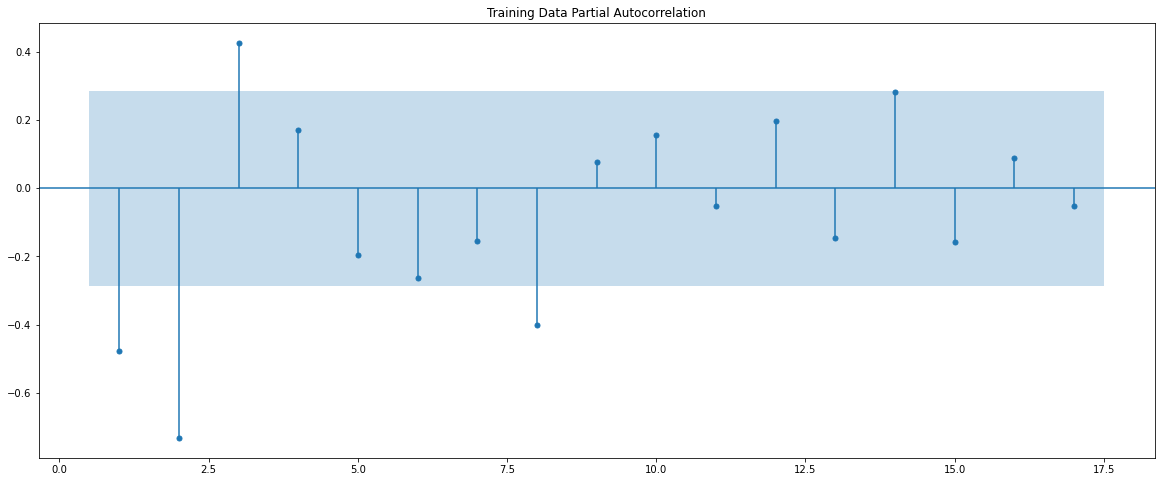

In [61]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [62]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -229.624
Date:                           Tue, 23 Feb 2021   AIC                            479.249
Time:                                   07:53:29   BIC                            491.437
Sample:                               01-31-2015   HQIC                           482.629
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4033      2.528     -0.160      0.873      -5.358       4.552
ar.L2         -0.3966      2.539     -0.156

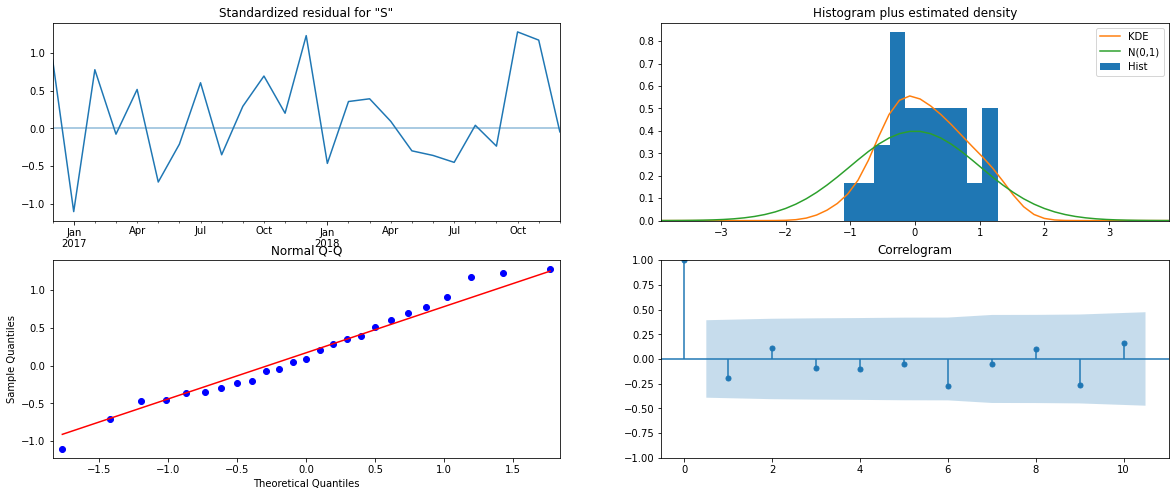

In [63]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [64]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [65]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2870.5384370887773 
MAPE: 9.367992796777662


In [66]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [67]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sales_quantity'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   64
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -942.380
Date:                           Tue, 23 Feb 2021   AIC                           1906.761
Time:                                   07:53:32   BIC                           1925.610
Sample:                               01-31-2015   HQIC                          1913.625
                                    - 04-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5435         -0        inf      0.000      -0.544      -0.544
ma.L1         -0.0418         -0        inf

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [69]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [70]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-05-31,20425.332965,3.829299e+09,-7.505267e+09,7.505308e+09
2020-06-30,26541.783749,4.145468e+09,-8.124941e+09,8.124994e+09
2020-07-31,25800.207886,4.336102e+09,-8.498578e+09,8.498630e+09
2020-08-31,16512.601434,5.321891e+09,-1.043070e+10,1.043073e+10
2020-09-30,25705.273683,5.721109e+09,-1.121314e+10,1.121319e+10


In [71]:
rmse = mean_squared_error(df['Sales_quantity'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 4647.431429119808


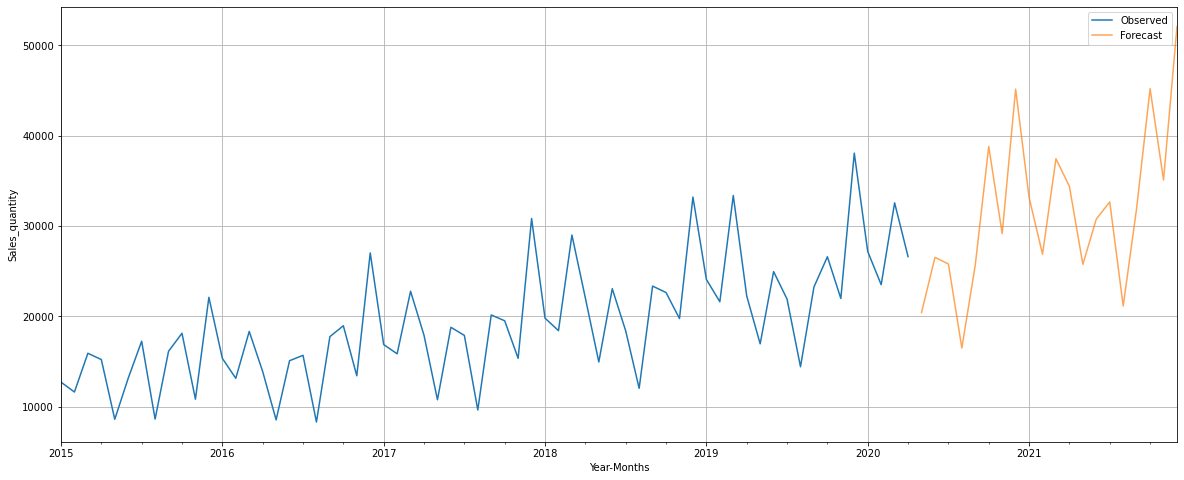

In [72]:
axis = df['Sales_quantity'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


# END